In [1]:
import pygmt
from glob import glob
import pandas as pd
import numpy as np
import os

out='venturelli2020-grl-fig1.pdf'

showme = False

In [2]:
datafold='/Users/siegfried/Documents/data'
moa=datafold + '/MODIS/MOA/moa750_2009_hp1_v1.1.nc'
gl=datafold + '/gz/scripps/scripps_antarctica_polygons_v1.gmt'
vel=datafold + '/velocity/measures-phase_v1/antarctic_ice_vel_phase_map_v01-vmag.nc'
lakefold = datafold + '/lakeoutlines/SiegfriedFricker2018/data_archive/active_lake_outlines/xy'
oldsites = 'drill_sites.txt'

# Old shapes that are good enough for continent-scale insets:
moa_coast = datafold + '/gz/moa/moa_coastline.gmt'
moa_gl = datafold + '/gz/moa/moa_groundingline.gmt'

figheight=115 # in mm

# Region for main part of the figure
ris_xl=-760000
ris_yl=-1400000
ris_xh=600000
ris_yh=-350000

figwidth=figheight*(ris_xh-ris_xl)/(ris_yh-ris_yl)
risratio = (ris_yh - ris_yl) / (figheight/1000)

risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh)
risproj = "x1:" + str(risratio)
risproj_ll = "s0/-90/-71/1:" + str(risratio)

# Region for Whillans Grounding Zone inset
wgz_xl=-185000
wgz_yl=-627500
wgz_xh=-145000
wgz_yh=-580000

wgzreg = str(wgz_xl) + '/' + str(wgz_xh) + '/' + str(wgz_yl) + '/' + str(wgz_yh)
wgzratio = risratio/7 # 7x zoom in for the WGZ inset
wgzmap = 'x1:' + str(wgzratio)

In [3]:
pygmt.makecpt(series = '15000/17000/1', cmap = 'gray', Z = True, output = 'moa.cpt')
with pygmt.config(COLOR_FOREGROUND = '240/249/33', COLOR_BACKGROUND = '13/8/135'):
    pygmt.makecpt(series = [0,1000,1], cmap = 'plasma', output = 'vel.cpt')

In [4]:
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = risreg, projection = risproj, frame=["nwse", "xf100000", "yf100000"], 
                 grid = moa, cmap = 'moa.cpt')

if showme:
    fig.show()

In [5]:
fig.grdimage(grid = vel, cmap = 'vel.cpt', t = 70, Q = 'True')

if showme:
    fig.show()

In [6]:
for file in glob(lakefold + '/*.xy'):
    data = pd.read_csv(file, delimiter = ' |\t', header = None, names = ['x','y'], engine = 'python', usecols = [0,1])
    blocks = np.split(data, np.where(np.isnan(data.x))[0])
    for i in np.arange(0,len(blocks)):
        fig.plot(x = blocks[i]['x'][~np.isnan(blocks[i]['x'])], 
                 y = blocks[i]['y'][~np.isnan(blocks[i]['y'])], 
                 pen = "0.5p,black",
                 color = 'cyan',
                 t = 60)

if showme:
    fig.show()

In [7]:
with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                  MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,grey',
                  MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                  MAP_TICK_PEN_PRIMARY = 'thinner,grey', FORMAT_GEO_MAP = 'dddF',
                  MAP_POLAR_CAP = '90/90'):
    fig.basemap(projection = risproj_ll, region = risreg,
                frame = ["NSWE", "xa15g15", "ya2g2"])

if showme:
    fig.show()

basemap [ERROR]: For a UTM or TM projection, your region -760000/600000/-1400000/-350000 is too large to be in degrees and thus assumed to be in meters


In [8]:
fig.plot(data = gl, region = risreg, projection = risproj, pen = '0.5p,white')

if showme:
    fig.show()

In [9]:
drill_locs = pd.read_csv(oldsites, delimiter = ' ', comment = '#')
fig.plot(x = drill_locs['x'], y = drill_locs['y'], pen = '0.75p,black', color = 'darkgray', style = 'c0.2c')
fig.text(x = drill_locs['x'], y = drill_locs['y'], text = drill_locs['name'],
         font = '8,Helvetica,white', justify = 'TR', D = '-0.1c')

wgz = {'x': -173786.056484, 'y': -590926.324943, 'name':'WGZ'} # -163.61187, -84.33543 in PS71
fig.plot(x = wgz['x'], y = wgz['y'], style = 'a0.3c', color = 'yellow', pen = '0.75p,black')
fig.text(x = wgz['x'], y = wgz['y'], text = wgz['name'], 
         font = '10p,Helvetica-Bold,yellow', justify = 'BR', D = '-0.05c/0.15c')

fig.plot(x = [wgz_xl, wgz_xl, wgz_xh, wgz_xh, wgz_xl], y = [wgz_yl, wgz_yh, wgz_yh, wgz_yl, wgz_yl], 
         pen = '1p,darkred')

if showme:
    fig.show()

In [10]:
big_labels = pd.DataFrame({'x': [0, 0, -450000, -450000, 450000, 450000], 
                           'y': [-900000, -930000, -650000, -680000, -650000, -680000], 
                           'label': ['Ross', 'Ice Shelf', 'West', 'Antarctica', 'East', 'Antarctica']})
small_labels = pd.DataFrame({'x': [-310000, -310000], 
                             'y': [-1010000, -1035000], 
                             'label': ['Roosevelt', 'Island']})
fig.text(x = big_labels['x'], y = big_labels['y'], text = big_labels['label'], 
         font = '10,Helvetica,white', justify = 'TC')
fig.text(x = small_labels['x'], y = small_labels['y'], text = small_labels['label'], 
         font = '8,Helvetica,white', justify = 'TC')

if showme:
    fig.show()

In [11]:
wid = 100000 # scale bar width, in m
xoff = 75000 # distance from left to put scale bar, in m
yoff = 50000 # distance from bottom to put scale bar, in m

xleft = xoff
xmid = wid/2 + xoff
xright = wid + xoff

fig.plot(x = [ris_xl + xleft, ris_xl + xright], y = [ris_yl + yoff, ris_yl + yoff], pen = '1.5p,white')
fig.text(x = ris_xl + xmid, y = ris_yl + yoff, text = '{:3.0f}'.format(wid/1000) + ' km', 
         font = '8p,Helvetica,white', justify = 'BC', D = '0/0.1c')

if showme:
    fig.show()

In [12]:
barwidth = figwidth/10 * 0.2 # color bar width is 20% of the map width, in cm

pos_str = 'jTL+w' + str(barwidth) + 'c+jTL+o1c/0.75c+h+ml'
# once with 50% transparency to get the transparent box
with pygmt.config(FONT_ANNOT_PRIMARY = '8p', FONT_LABEL = '8p', 
                  MAP_ANNOT_OFFSET_PRIMARY = '2p', MAP_TICK_PEN_PRIMARY = '0.5p', 
                  MAP_TICK_LENGTH_PRIMARY = '3p', MAP_FRAME_PEN = '0.5p', MAP_LABEL_OFFSET = '4p'):
    fig.colorbar(cmap = 'vel.cpt', position = pos_str,
                 frame = 'xa500+l"ice velocity [m a@+-1@+]"', box = '+gwhite+p0.5p,black+c3p', t = '50')

# plot again without a box and no transparency
with pygmt.config(FONT_ANNOT_PRIMARY = '8p', FONT_LABEL = '8p', 
                  MAP_ANNOT_OFFSET_PRIMARY = '2p', MAP_TICK_PEN_PRIMARY = '0.5p', 
                  MAP_TICK_LENGTH_PRIMARY = '3p', MAP_FRAME_PEN = '0.5p', MAP_LABEL_OFFSET = '4p'):
    fig.colorbar(cmap = 'vel.cpt', position = pos_str, frame = 'xa500f250+l"ice velocity [m a@+-1@+]"')

if showme:
    fig.show()

In [13]:
fig.text(x = ris_xl, y = ris_yh, text = 'a.', font = '12,Helvetica-Bold,black', justify = 'TL', D = '0.1c/-0.1c')

if showme:
    fig.show()

In [14]:
# Make insets
antwidth = 3 # width of inset in cm
antreg = '-2900000/-2900000/2900000/2900000r'
antmap = 'X' + str(antwidth) + 'c'

# generate offset string based on inset width
xoff_str = 'a' + str(figwidth/10 - antwidth) + 'c'
yoff_str = 'a' + str(figheight/10 - antwidth) + 'c'

fig.basemap(projection = antmap, region = antreg, frame = '+n', X = xoff_str, Y = yoff_str)
fig.plot(data = moa_coast, color = 'white', X = xoff_str, Y = yoff_str)
fig.plot(data = moa_gl, color = 'gray', X = xoff_str, Y = yoff_str)
fig.plot(x = [ris_xl, ris_xl, ris_xh, ris_xh, ris_xl], y = [ris_yl, ris_yh, ris_yh, ris_yl, ris_yl], 
         pen = '1p,black', X = xoff_str, Y = yoff_str)

if showme:
    fig.show()

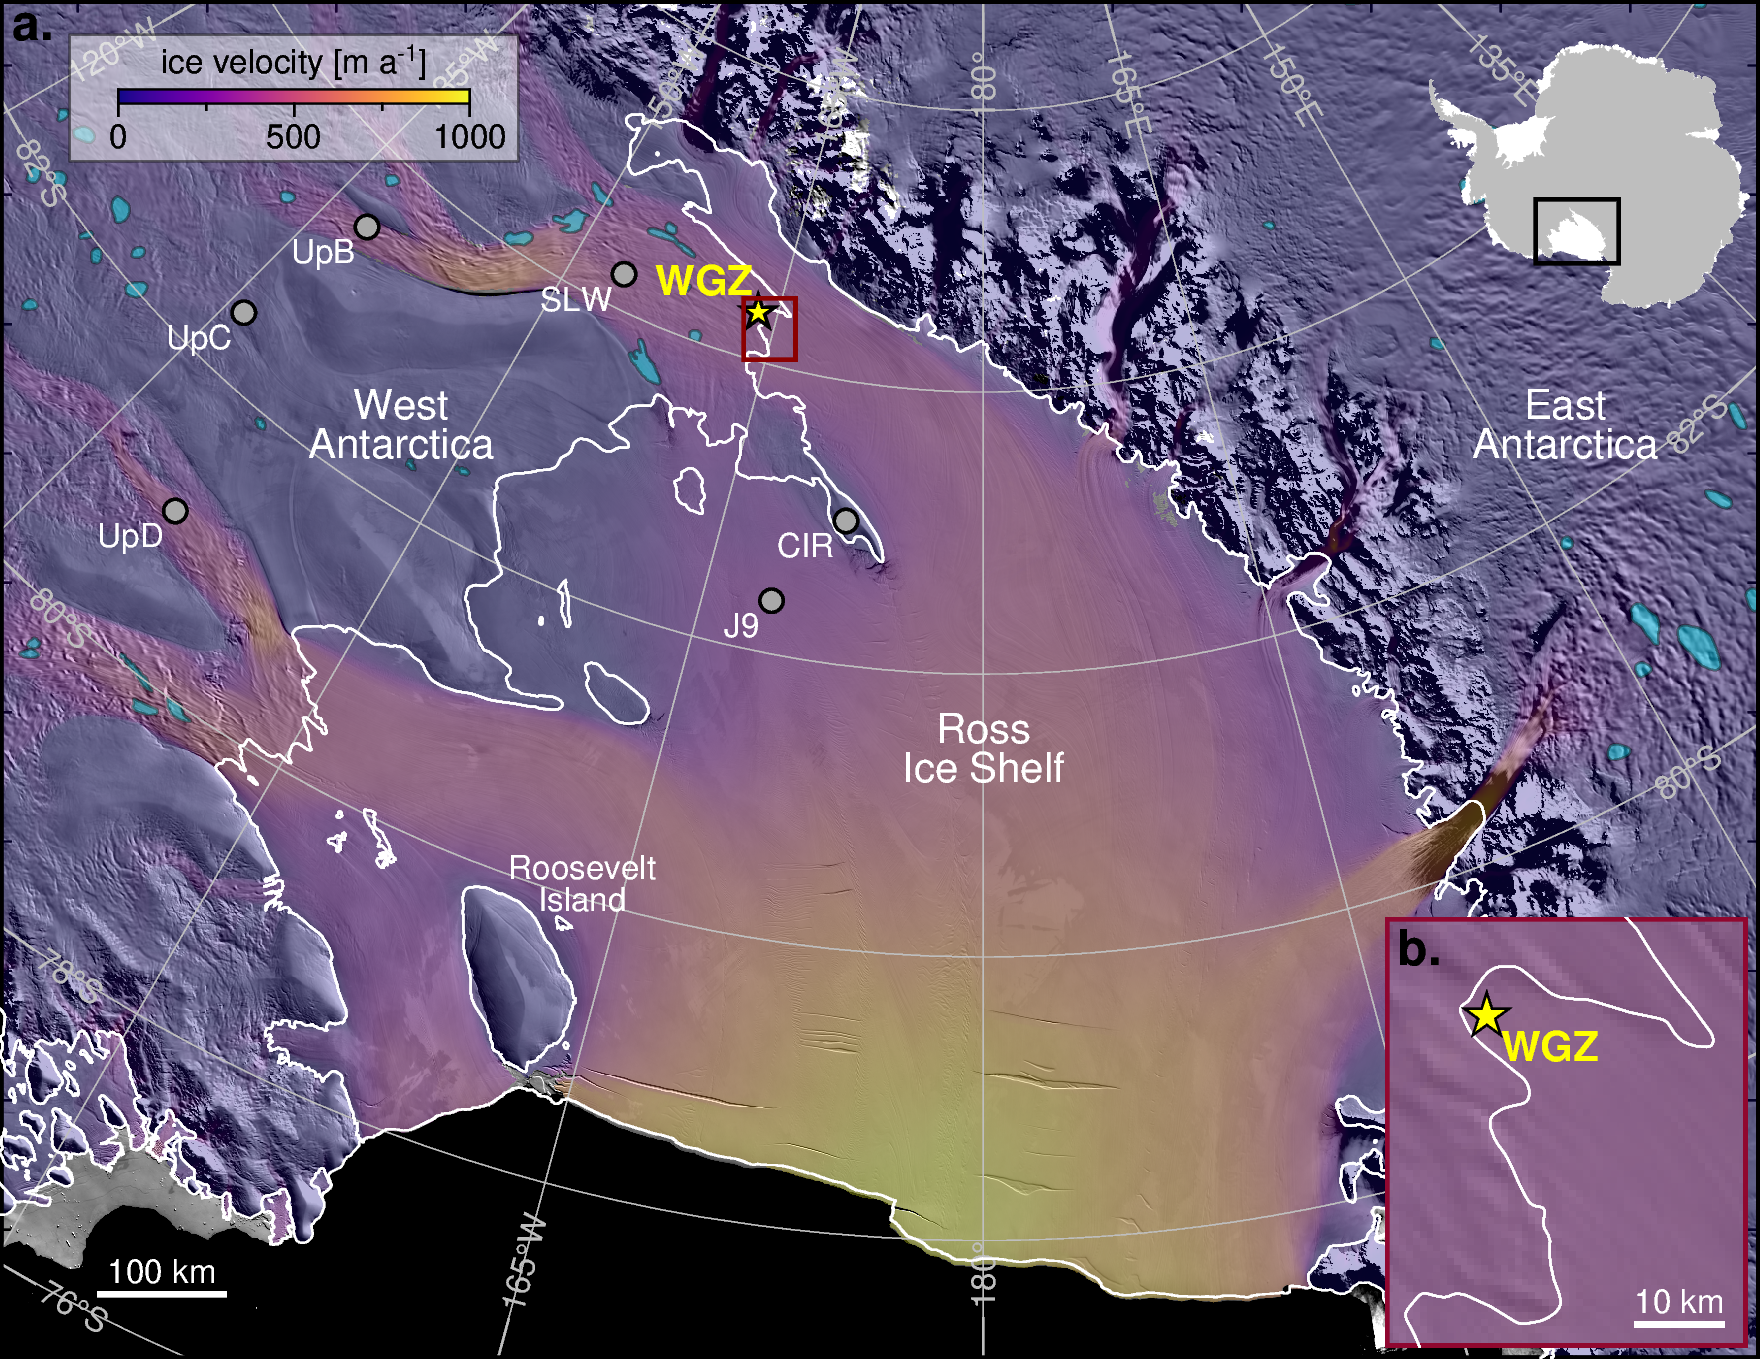

In [15]:
######## Zoom in of WGZ inset
fromborder = 0.1 #distance from border of figure in cm

wgzwidth = (wgz_xh - wgz_xl) / wgzratio * 100 # width of inset, in cm
xoff = figwidth/10 - (wgzwidth + fromborder)
yoff = fromborder
# generate offset strings offsets we just calculated
xoff_inset = 'a' + str(xoff) + 'c'
yoff_inset = 'a' + str(yoff) + 'c'

with pygmt.config(MAP_FRAME_TYPE = 'inside', MAP_FRAME_PEN = '2p,darkred'):
    fig.grdimage(region = wgzreg, projection = wgzmap, frame = ['nswe'], 
                X = xoff_inset, Y = yoff_inset, grid = moa, cmap = 'moa.cpt')
fig.grdimage(grid = vel, cmap = 'vel.cpt', t = 70, X = xoff_inset, Y = yoff_inset)
fig.plot(data = gl, pen = '0.5p,white', X = xoff_inset, Y = yoff_inset)
fig.plot(x = wgz['x'], y = wgz['y'], style = 'a0.4c', color = 'yellow', 
         pen = '0.5p,black', X = xoff_inset, Y = yoff_inset)
fig.text(x = wgz['x'], y = wgz['y'], text = wgz['name'], font = '10,Helvetica-Bold,yellow', 
         justify = 'TL', D = '0.12c/-0.12c', X = xoff_inset, Y = yoff_inset)

# draw scale bar
wid = 10000 # scale bar length, in m
xoff = 2500
yoff = 2500

xleft = xoff + wid
xmid = xoff + wid/2
xright = xoff

fig.plot(x = [wgz_xh - xleft, wgz_xh - xright], y = [wgz_yl + yoff, wgz_yl + yoff], 
         pen = '1.5p,white', X = xoff_inset, Y = yoff_inset)
fig.text(x = wgz_xh - xmid, y = wgz_yl + yoff, text = '{:3.0f}'.format(wid/1000) + ' km', 
         font = '8p,Helvetica,white', justify = 'BC', D = '0/0.1c', X = xoff_inset, Y = yoff_inset)

# put a subpanel label
fig.text(x = wgz_xl, y = wgz_yh, text = 'b.', font = '12,Helvetica-Bold,Black', 
         justify = 'TL', D = '0.1c/-0.1c', X = xoff_inset, Y = yoff_inset)

fig.show()

In [16]:
fig.savefig(out)

del_files = ['moa.cpt','vel.cpt']
for n in del_files:
    os.remove(n)